In [30]:
using LinearAlgebra
using Plots
using IterTools

In [8]:
s = collect(0.0:0.1:1.0)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [13]:
A_1 = [-0.327 0.393 -0.097 0.079; 0.3935 -1.516 0.032 -0.302; 0.101 0.716 -0.118 0.142]
A_2 = [0.9475 -0.018 0.158 0.01; -0.276 -0.126 -0.341 0.035; 0.048 0.263 0.186 -0.067]
B_1 = [0.0 0.284 0.006 -0.059; 0.0 1.045 0.317 0.226; 0.0 -1.017 -0.276 -0.196]
B_2 = [0.0 0.192 -0.05 0.012; 0.0 -0.499 0.423 0.138; 0.0 0.339 -0.327 -0.114]

3×4 Matrix{Float64}:
 0.0   0.192  -0.05    0.012
 0.0  -0.499   0.423   0.138
 0.0   0.339  -0.327  -0.114

In [15]:
N = 3
M = 3
L = 10.0

10.0

In [17]:
function ξ(s::Real, ϕ::Real)
    [dot(s.^collect(1:M), A_1*cos.(collect(0:N)*ϕ) + B_1*sin.(collect(0:N)*ϕ));
    dot(s.^collect(1:M), A_2*cos.(collect(0:N)*ϕ) + B_2*sin.(collect(0:N)*ϕ))]
end

ξ (generic function with 1 method)

In [36]:
function ξ(sϕ::Tuple)
    ξ(sϕ[1], sϕ[2])
end

ξ (generic function with 3 methods)

In [33]:
t = collect(0.0:0.1:2*pi)
st = collect(product(s, t))

11×63 Matrix{Tuple{Float64, Float64}}:
 (0.0, 0.0)  (0.0, 0.1)  (0.0, 0.2)  …  (0.0, 6.0)  (0.0, 6.1)  (0.0, 6.2)
 (0.1, 0.0)  (0.1, 0.1)  (0.1, 0.2)     (0.1, 6.0)  (0.1, 6.1)  (0.1, 6.2)
 (0.2, 0.0)  (0.2, 0.1)  (0.2, 0.2)     (0.2, 6.0)  (0.2, 6.1)  (0.2, 6.2)
 (0.3, 0.0)  (0.3, 0.1)  (0.3, 0.2)     (0.3, 6.0)  (0.3, 6.1)  (0.3, 6.2)
 (0.4, 0.0)  (0.4, 0.1)  (0.4, 0.2)     (0.4, 6.0)  (0.4, 6.1)  (0.4, 6.2)
 (0.5, 0.0)  (0.5, 0.1)  (0.5, 0.2)  …  (0.5, 6.0)  (0.5, 6.1)  (0.5, 6.2)
 (0.6, 0.0)  (0.6, 0.1)  (0.6, 0.2)     (0.6, 6.0)  (0.6, 6.1)  (0.6, 6.2)
 (0.7, 0.0)  (0.7, 0.1)  (0.7, 0.2)     (0.7, 6.0)  (0.7, 6.1)  (0.7, 6.2)
 (0.8, 0.0)  (0.8, 0.1)  (0.8, 0.2)     (0.8, 6.0)  (0.8, 6.1)  (0.8, 6.2)
 (0.9, 0.0)  (0.9, 0.1)  (0.9, 0.2)     (0.9, 6.0)  (0.9, 6.1)  (0.9, 6.2)
 (1.0, 0.0)  (1.0, 0.1)  (1.0, 0.2)  …  (1.0, 6.0)  (1.0, 6.1)  (1.0, 6.2)

In [38]:
positions = ξ.(st)

11×63 Matrix{Vector{Float64}}:
 [0.0, 0.0]            [0.0, 0.0]               …  [0.0, 0.0]
 [-0.008284, 0.1031]   [-0.00510562, 0.104769]     [-0.0111691, 0.10126]
 [-0.039372, 0.19462]  [-0.029256, 0.199175]       [-0.0477217, 0.190084]
 [-0.088218, 0.27714]  [-0.0687364, 0.285396]      [-0.103572, 0.269369]
 [-0.149776, 0.35324]  [-0.119832, 0.365611]       [-0.172633, 0.342011]
 [-0.219, 0.4255]      [-0.178827, 0.441999]    …  [-0.248818, 0.410907]
 [-0.290844, 0.4965]   [-0.242008, 0.516739]       [-0.326043, 0.478952]
 [-0.360262, 0.56882]  [-0.305659, 0.59201]        [-0.398219, 0.549044]
 [-0.422208, 0.64504]  [-0.366066, 0.669992]       [-0.459262, 0.624078]
 [-0.471636, 0.72774]  [-0.419513, 0.752862]       [-0.503085, 0.706952]
 [-0.5035, 0.8195]     [-0.462286, 0.8428]      …  [-0.523602, 0.800561]

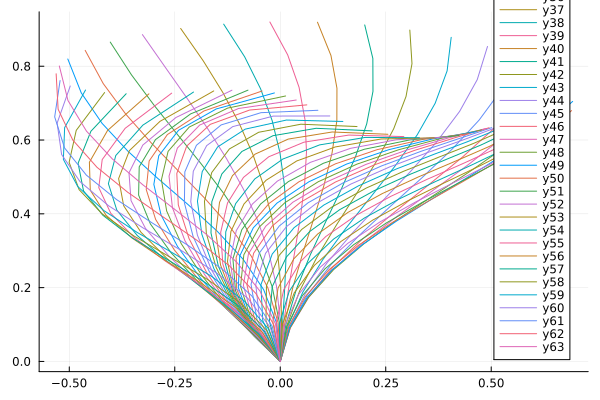

In [87]:
p = plot()
for j = 1:size(positions)[2]
    plot!(getindex.(positions[:, j], 1), getindex.(positions[:, j], 2))
end
display(p)